<a href="https://colab.research.google.com/github/seblobubbleman/See-n-Say-Image-Classifier/blob/master/See'n_Say_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 55.2MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
#make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [ ]:
from fastai.vision import *

In [ ]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from  google.colab import drive

In [ ]:
#save path to project folder 
root_path = 'gdrive/My Drive/AI Projects/'

In [ ]:
# uncomment to make balls folder 
(Path(root_path)/'Animal Images').mkdir(parents=True, exist_ok=True)

In [ ]:
#save path for balls folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/AI Projects/Animal Images/'

In [ ]:
#make folder names 
folders = ['Cat','Bird','Cow','Dog','Coyote','Duck','Frog',
           'Horse','Pig','Rooster','Sheep','Turkey']

In [ ]:

#create all folders in /Balls
for i in folders:
  path = Path(proj_path)
  dest = (path/i).mkdir(parents=True, exist_ok=True)

In [ ]:
#save fastai path 
p_path = Path(proj_path)

In [ ]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['Bird',
 'Cat',
 'Cow',
 'Coyote',
 'Dog',
 'Duck',
 'Frog',
 'Horse',
 'Pig',
 'Rooster',
 'Sheep',
 'Turkey']

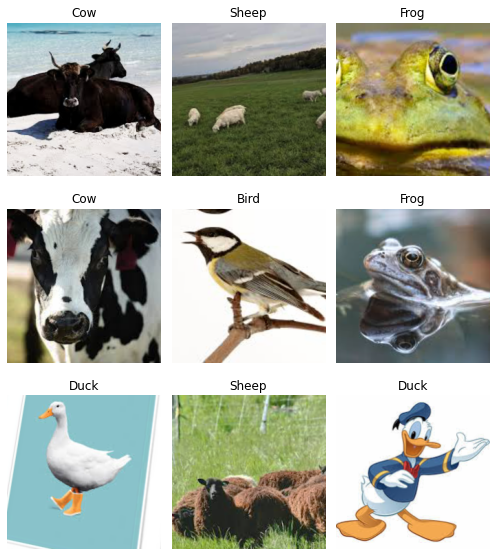

In [ ]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Bird',
  'Cat',
  'Cow',
  'Coyote',
  'Dog',
  'Duck',
  'Frog',
  'Horse',
  'Pig',
  'Rooster',
  'Sheep',
  'Turkey'],
 12,
 1920,
 480)

In [ ]:
# create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.244395,0.405419,0.131250,03:07
1,1.097368,0.304529,0.075000,00:22
2,0.645047,0.262978,0.077083,00:22
3,0.441427,0.243581,0.068750,00:22
4,0.320979,0.260029,0.072917,00:22
5,0.259293,0.259878,0.079167,00:22
6,0.213054,0.244736,0.068750,00:22
7,0.176968,0.249110,0.068750,00:21


In [ ]:
#save model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI Projects/Animal Images/models/model1_34.pth')

In [ ]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


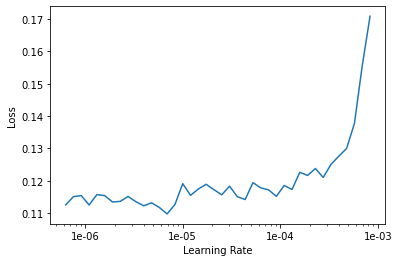

In [ ]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [ ]:
# fit whole model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.146839,0.232164,0.066667,00:22
1,0.122405,0.229914,0.058333,00:23


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


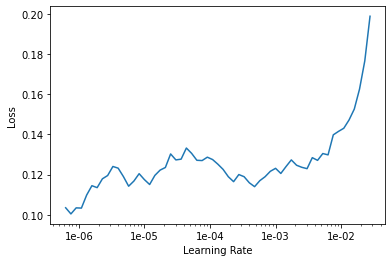

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('model2_34')

In [ ]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

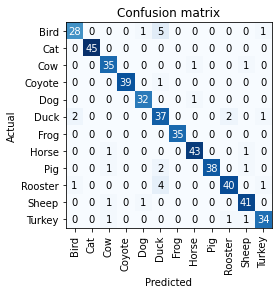

In [ ]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

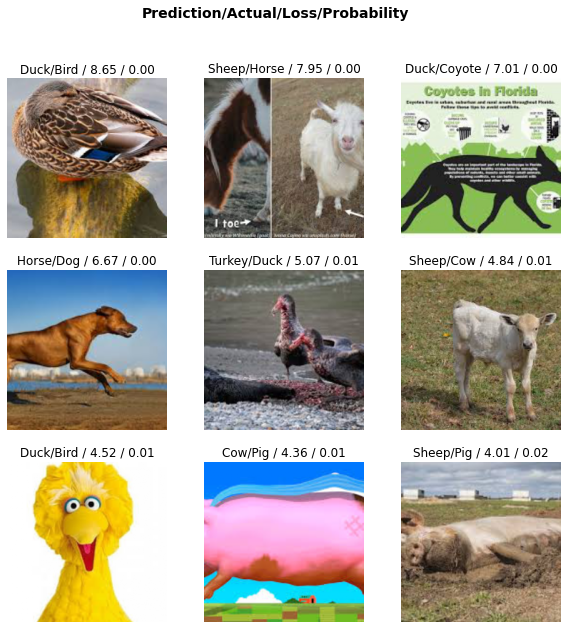

In [ ]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))